# **Plot skin friction *Cf* for the solver "wmSimpleFoam"**

1. No wall function

2. With standard wall function

3. Wall function of "wmSimpleFoam" with correction at the wall

4. Wall function of "wmSimpleFoam" with additional correction at the first face (wall and face blending)

5. Wall function of "wmSimpleFoam" with additional correction at the first face (only face blending)

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import cycle

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

# Set macro for paths
run = "../run/"

In [2]:
UInf = 69.4
nuInf = 1.388e-05

model_sa = "SpalartAllmaras"
yp = ['0.05', '1', '2', '5', '10', '30', '50', '100']
res_list = ['1e-5']

In [3]:
tauw_path_nowall = [run + 'turbulentFlatPlate_SA_noWallFunc/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_nowall = [pd.read_csv(tauw_path_nowall[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_nowall[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.3374,-0.943654,0
1,0.001458,-21.1201,-0.004816,0
2,0.002433,-16.4140,-0.000939,0
3,0.003410,-14.7323,-0.000377,0
4,0.004390,-13.8445,-0.000209,0


In [4]:
tauw_path_wall = [run + 'turbulentFlatPlate_SA/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wall = [pd.read_csv(tauw_path_wall[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wall[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.3374,-0.943654,0
1,0.001458,-21.1201,-0.004816,0
2,0.002433,-16.4140,-0.000939,0
3,0.003410,-14.7323,-0.000377,0
4,0.004390,-13.8445,-0.000209,0


In [5]:
tauw_path_wmSFwall = [run + 'turbulentFlatPlate_wmSF_onlywall/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wmSFwall = [pd.read_csv(tauw_path_wmSFwall[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wmSFwall[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,dUdy_sp_wall,dUdy_sp_face,uTau,Conv_uTau,magGradU_wall,magGradU_face,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face
0,0.000486,1.000000,1.000001,0.000014,0.000014,-3.481935e+06,-3.481913e+06,6.951925,1,3.481937e+06,3.405406e+06,0.967368,0.009440,1.913472,0.018827,72.322648,72.319905
1,0.001458,0.999999,1.000000,0.000014,0.000014,-1.521458e+06,-1.521459e+06,4.595414,1,1.521458e+06,1.520783e+06,0.422719,0.000059,0.845250,0.000216,5.149157,5.154083
2,0.002433,0.999999,1.000000,0.000014,0.000014,-1.182465e+06,-1.182467e+06,4.051249,1,1.182466e+06,1.182748e+06,0.328534,0.000011,0.657146,0.000043,17.349021,17.350031
3,0.003410,0.999999,1.000000,0.000014,0.000014,-1.061357e+06,-1.061358e+06,3.838180,1,1.061357e+06,1.061417e+06,0.294885,0.000005,0.589787,0.000017,18.885801,18.886208
4,0.004390,0.999999,1.000000,0.000014,0.000014,-9.974168e+05,-9.974183e+05,3.720772,1,9.974171e+05,9.974671e+05,0.277120,0.000003,0.554254,0.000010,20.330157,20.330382


In [6]:
tauw_path_wmSFface = [run + 'turbulentFlatPlate_wmSF_1stface_wallAndFaceblend/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wmSFface = [pd.read_csv(tauw_path_wmSFface[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wmSFface[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,dUdy_sp_wall,dUdy_sp_face,yPlusFace,nut_face,uTau,...,magGradU_face,U_tilde,wall_blending,face_blending,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face
0,0.000486,1.0,1.000312,0.000014,0.000014,-3.481963e+06,-3.481928e+06,0.278316,4.323798e-09,6.951953,...,3.404375e+06,0.013940,3.481961e+06,3.480847e+06,0.967375,0.009441,1.913193,0.018828,72.324669,72.321920
1,0.001458,1.0,1.000006,0.000014,0.000014,-1.521515e+06,-1.522151e+06,0.183950,7.973178e-11,4.594805,...,1.520770e+06,0.006091,1.521453e+06,1.522143e+06,0.422717,0.000059,0.845245,0.000216,5.150788,5.155712
2,0.002433,1.0,1.000001,0.000014,0.000014,-1.182537e+06,-1.182967e+06,0.162169,1.406800e-11,4.050758,...,1.182748e+06,0.004734,1.182466e+06,1.182966e+06,0.328534,0.000011,0.657146,0.000043,17.351623,17.352633
3,0.003410,1.0,1.000002,0.000014,0.000014,-1.061430e+06,-1.061794e+06,0.153641,2.239369e-11,3.837732,...,1.061418e+06,0.004249,1.061359e+06,1.061791e+06,0.294886,0.000005,0.589788,0.000017,18.888184,18.888591
4,0.004390,1.0,1.000002,0.000014,0.000014,-9.974897e+05,-9.978204e+05,0.148941,2.090451e-11,3.720345,...,9.974687e+05,0.003993,9.974189e+05,9.978186e+05,0.277121,0.000003,0.554255,0.000010,20.332534,20.332760


In [7]:
tauw_path_wmSFface2 = [run + 'turbulentFlatPlate_wmSF_1stface_wallfixFaceblend/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wmSFface2 = [pd.read_csv(tauw_path_wmSFface2[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wmSFface2[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,dUdy_sp_wall,dUdy_sp_face,yPlusFace,nut_face,uTau,...,magGradU_face,U_tilde,wall_blending,face_blending,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face
0,0.000486,1.000000,1.000312,0.000014,0.000014,-3.481961e+06,-3.481926e+06,0.278316,4.323694e-09,6.951951,...,3.404375e+06,0.013940,3.481960e+06,3.480845e+06,0.967374,0.009441,1.913192,0.018828,72.324492,72.321743
1,0.001458,1.000040,1.000005,0.000014,0.000014,-1.521454e+06,-1.522090e+06,0.183946,7.630113e-11,4.594712,...,1.520771e+06,0.006091,1.521392e+06,1.522082e+06,0.422700,0.000059,0.845228,0.000216,5.150590,5.155514
2,0.002433,1.000059,1.000001,0.000014,0.000014,-1.182467e+06,-1.182897e+06,0.162164,1.014395e-11,4.050639,...,1.182749e+06,0.004734,1.182396e+06,1.182896e+06,0.328514,0.000011,0.657127,0.000043,17.351399,17.352410
3,0.003410,1.000067,1.000001,0.000014,0.000014,-1.061360e+06,-1.061724e+06,0.153636,1.847506e-11,3.837606,...,1.061418e+06,0.004249,1.061289e+06,1.061722e+06,0.294866,0.000005,0.589768,0.000017,18.887967,18.888375
4,0.004390,1.000071,1.000001,0.000014,0.000014,-9.974200e+05,-9.977507e+05,0.148936,1.698569e-11,3.720215,...,9.974692e+05,0.003993,9.973492e+05,9.977489e+05,0.277101,0.000003,0.554236,0.000010,20.332323,20.332548


In [8]:
x0 = 0
Rex = (tauw_data_nowall[0]['ccx'] - x0)*UInf/nuInf
Cf_nowall = [np.sqrt(tauw_data_nowall[i + len(res_list)*j]['tau_xx']**2 + tauw_data_nowall[i + len(res_list)*j]['tau_yy']**2 + tauw_data_nowall[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_wall = [np.sqrt(tauw_data_wall[i + len(res_list)*j]['tau_xx']**2 + tauw_data_wall[i + len(res_list)*j]['tau_yy']**2 + tauw_data_wall[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_wmSFwall = [tauw_data_wmSFwall[i + len(res_list)*j]['nuEff_wall']*tauw_data_wmSFwall[i + len(res_list)*j]['magGradU_wall']/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_wmSFface = [tauw_data_wmSFface[i + len(res_list)*j]['nuEff_wall']*tauw_data_wmSFface[i + len(res_list)*j]['magGradU_wall']/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_wmSFface2 = [tauw_data_wmSFface2[i + len(res_list)*j]['nuEff_wall']*tauw_data_wmSFface2[i + len(res_list)*j]['magGradU_wall']/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]

In [9]:
wieghardt = 0.288*(np.log10(Rex))**(-2.45)

### Comparison of *Cf* for various settings

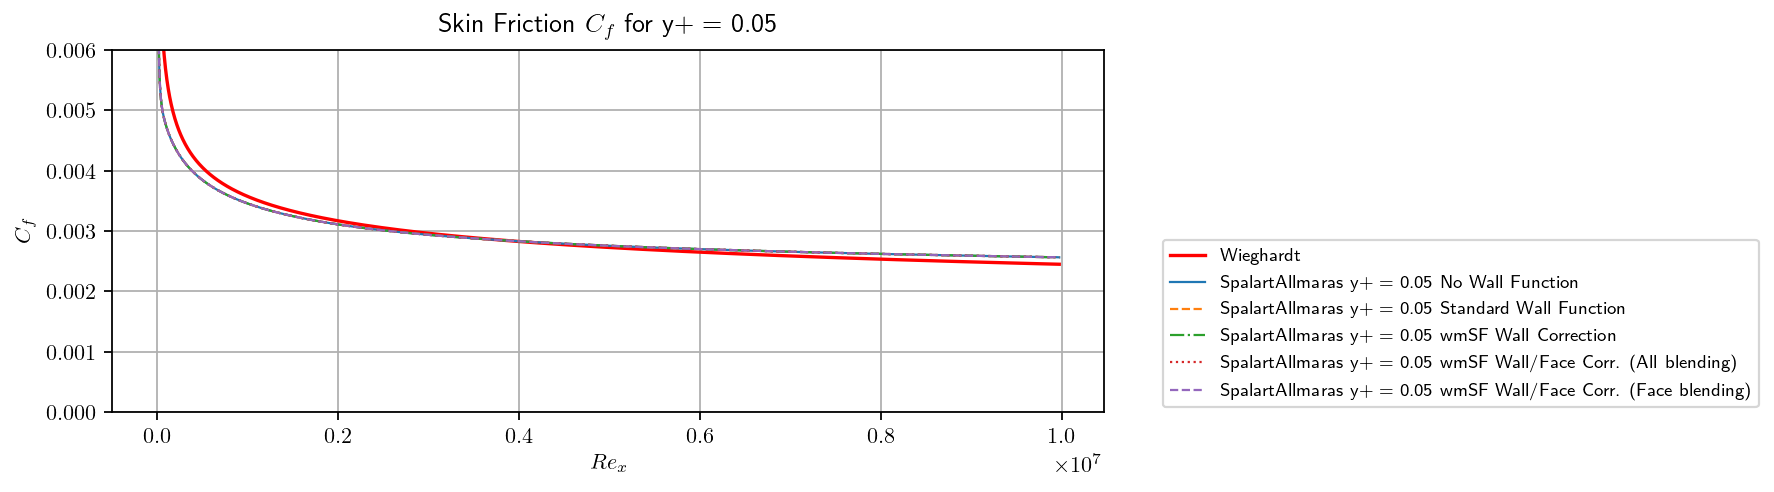

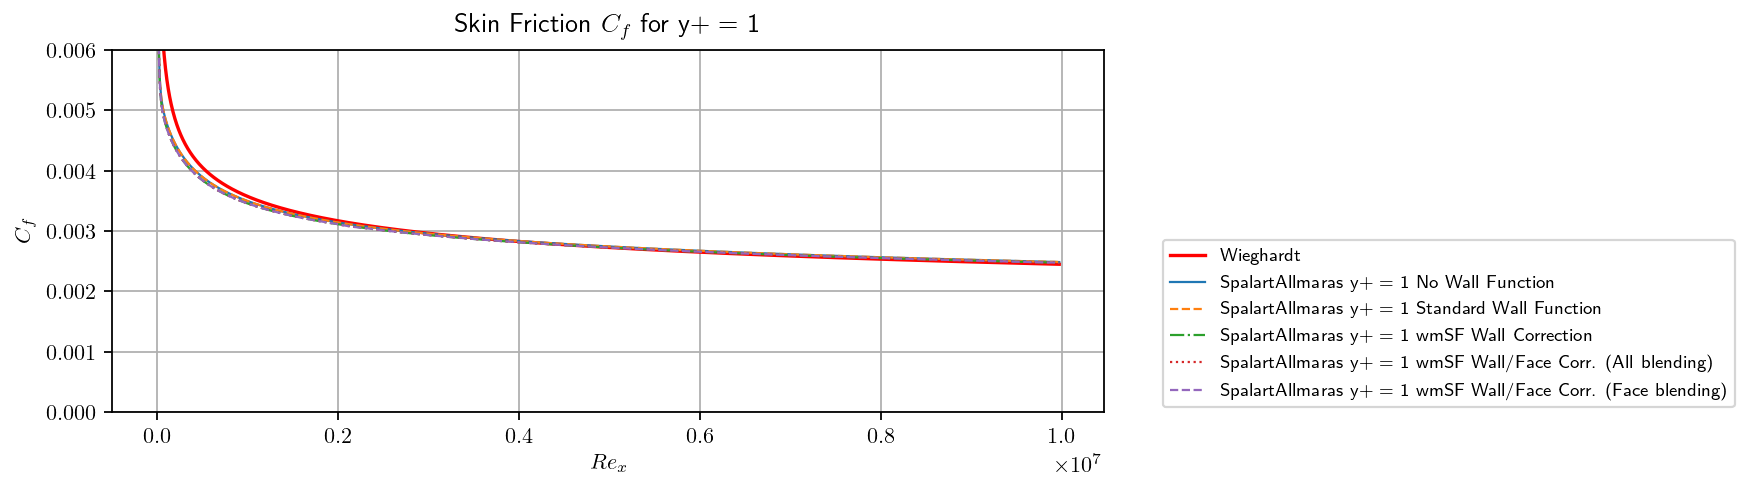

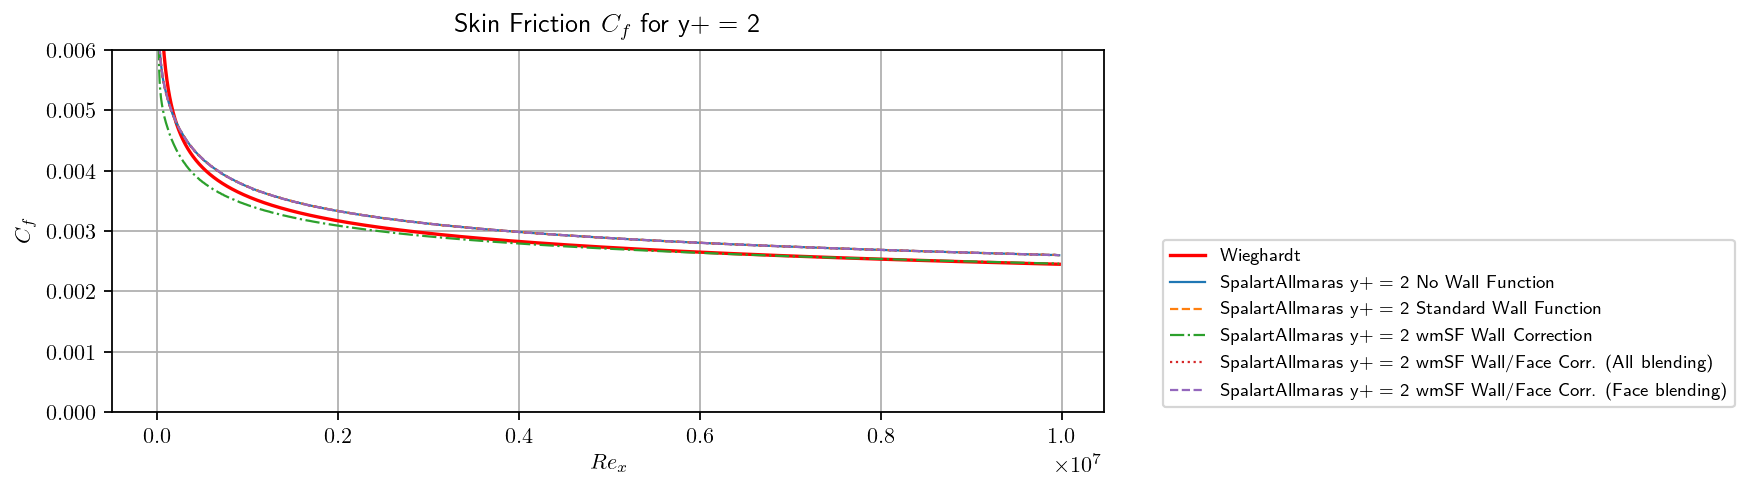

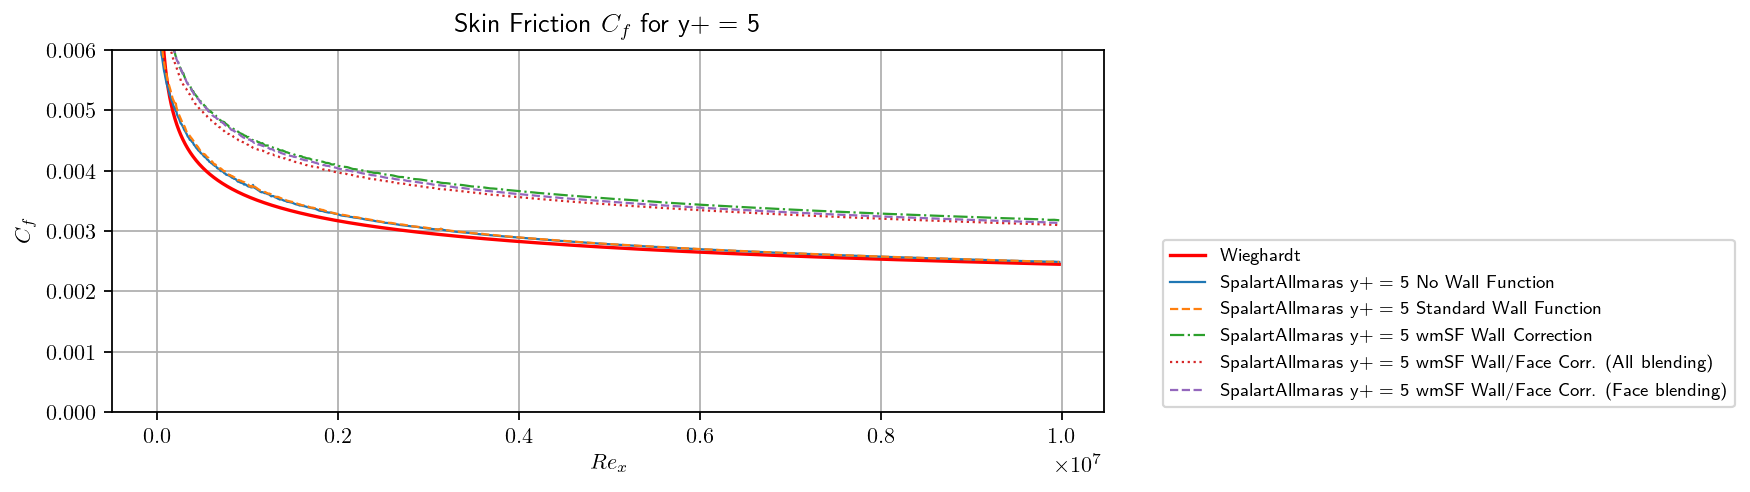

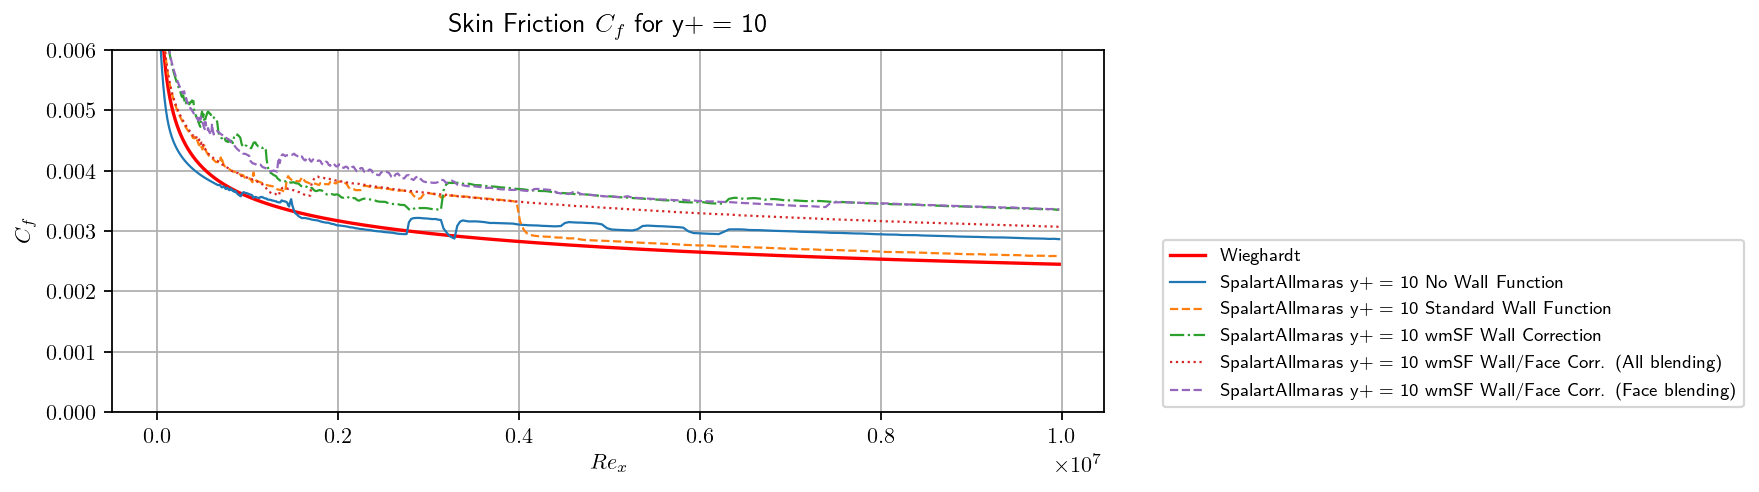

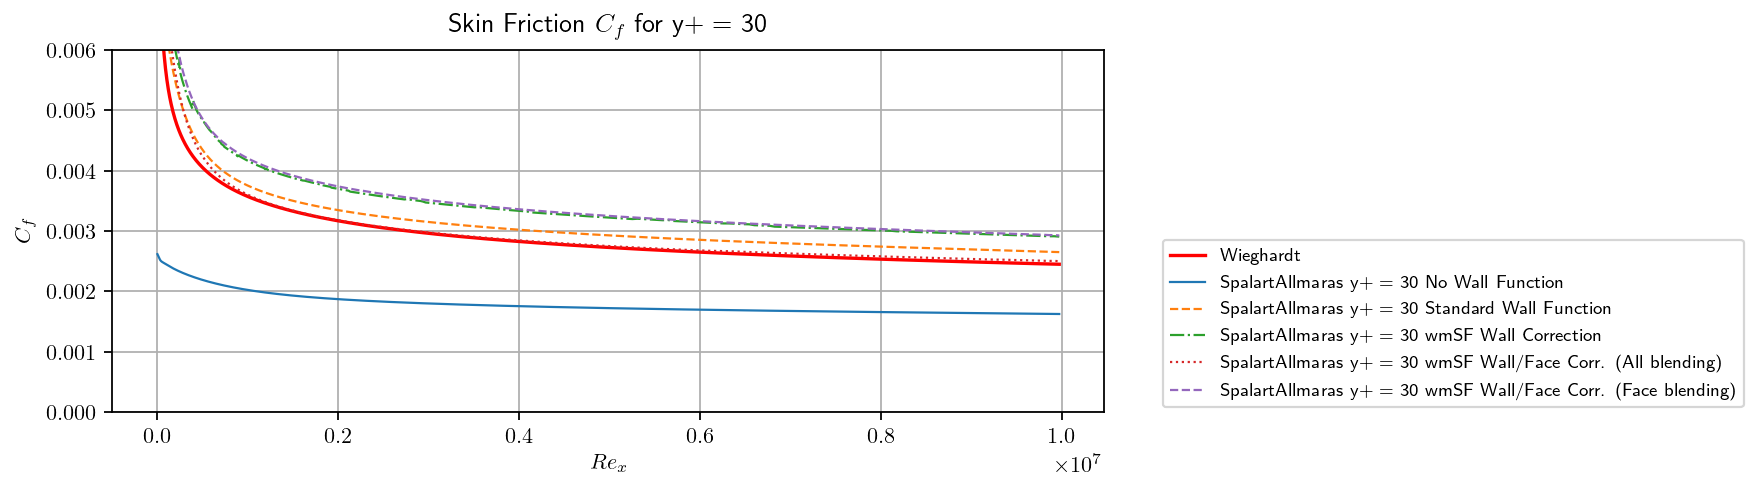

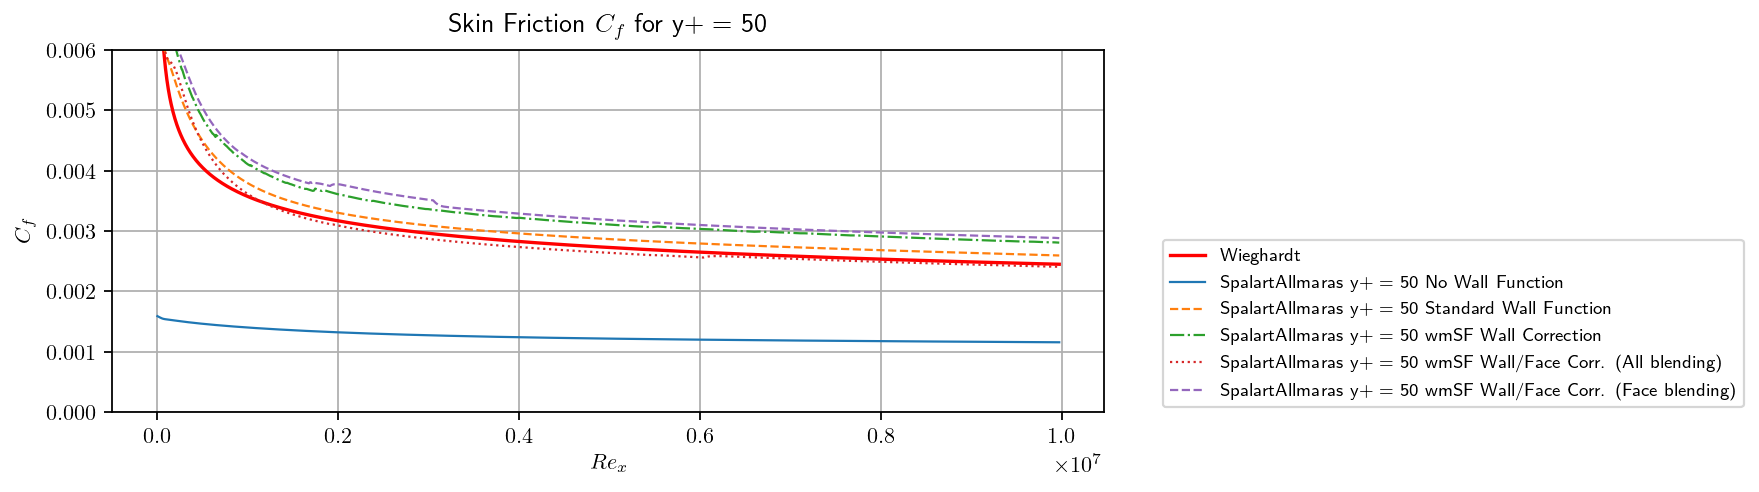

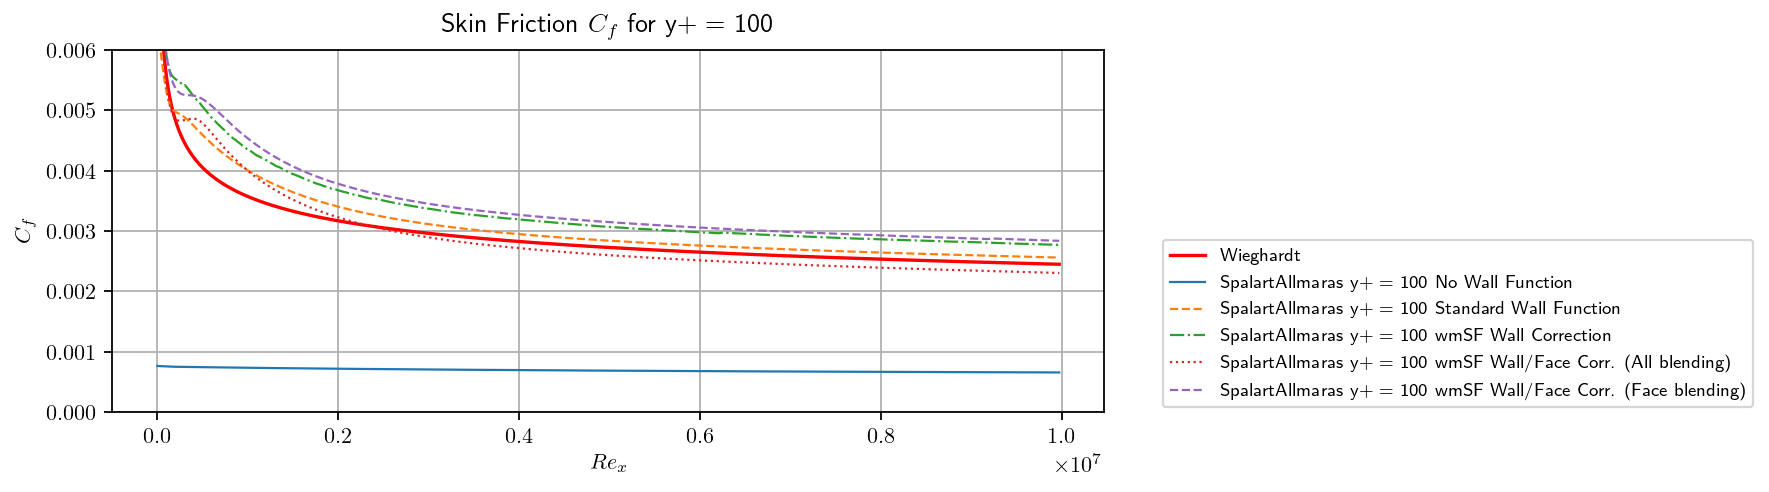

In [14]:
style = ["-", "--", "-.", ":", "--", "-."]
lw = 1.0
for j in range(len(yp)):
    fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    plt.ylim([0, 0.006])
    plt.grid()
    ax.set_xlabel(r"$Re_x$")
    ax.set_ylabel(r"$C_f$")
    plt.title(r"Skin Friction $C_f$ for y+ = {}".format(yp[j]))
    ax.plot(Rex, wieghardt, color = "r", label = "Wieghardt")    
    for i in range(len(res_list)):
        ax.plot(Rex, Cf_nowall[i + len(res_list)*j], label = "{} y+ = {} No Wall Function".format(model_sa, yp[j]), ls = style[i], c = "C{:d}".format(i), lw = lw)
        ax.plot(Rex, Cf_wall[i + len(res_list)*j], label = "{} y+ = {} Standard Wall Function".format(model_sa, yp[j]), ls = style[i+1], c = "C{:d}".format(i+1), lw = lw)
        ax.plot(Rex, Cf_wmSFwall[i + len(res_list)*j], label = "{} y+ = {} wmSF Wall Correction".format(model_sa, yp[j]), ls = style[i+2], c = "C{:d}".format(i+2), lw = lw)        
        ax.plot(Rex, Cf_wmSFface[i + len(res_list)*j], label = "{} y+ = {} wmSF Wall/Face Corr. (All blending)".format(model_sa, yp[j]), ls = style[i+3], c = "C{:d}".format(i+3), lw = lw)
        ax.plot(Rex, Cf_wmSFface2[i + len(res_list)*j], label = "{} y+ = {} wmSF Wall/Face Corr. (Face blending)".format(model_sa, yp[j]), ls = style[i+4], c = "C{:d}".format(i+4), lw = lw)
        ax.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.5))        

### Comparison *Cf* of wmSF wall function with the correction at the wall for different *y+*

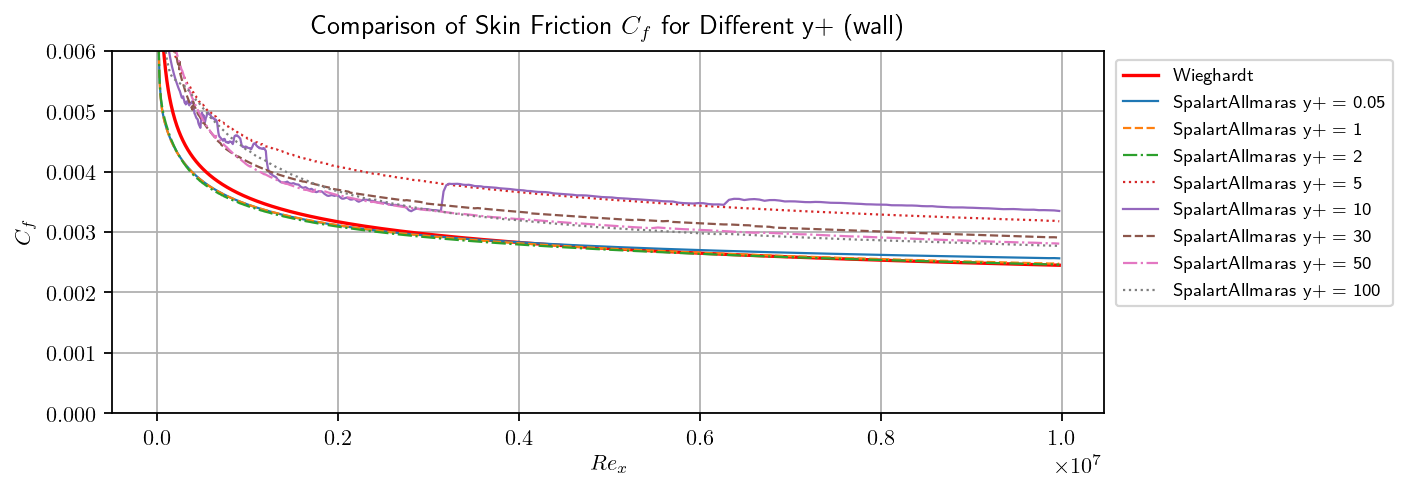

In [15]:
style2 = ["-", "--", "-.", ":"]
lw2 = 1.0
stylecycler = cycle(style2)

fig2, ax2 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
ax2.set_xlabel(r"$Re_x$")
ax2.set_ylabel(r"$C_f$")
plt.title(r"Comparison of Skin Friction $C_f$ for Different y+ (wall)")
ax2.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax2.plot(Rex, Cf_wmSFwall[i + len(res_list)*j], label = "{} y+ = {}".format(model_sa, yp[j]), ls = next(stylecycler), c = "C{:d}".format(j), lw = lw2)
        ax2.legend(fontsize = 8, bbox_to_anchor=(1.3, 1))        

### Comparison *Cf* of wmSF wall function with the correction at the first face for different *y+*

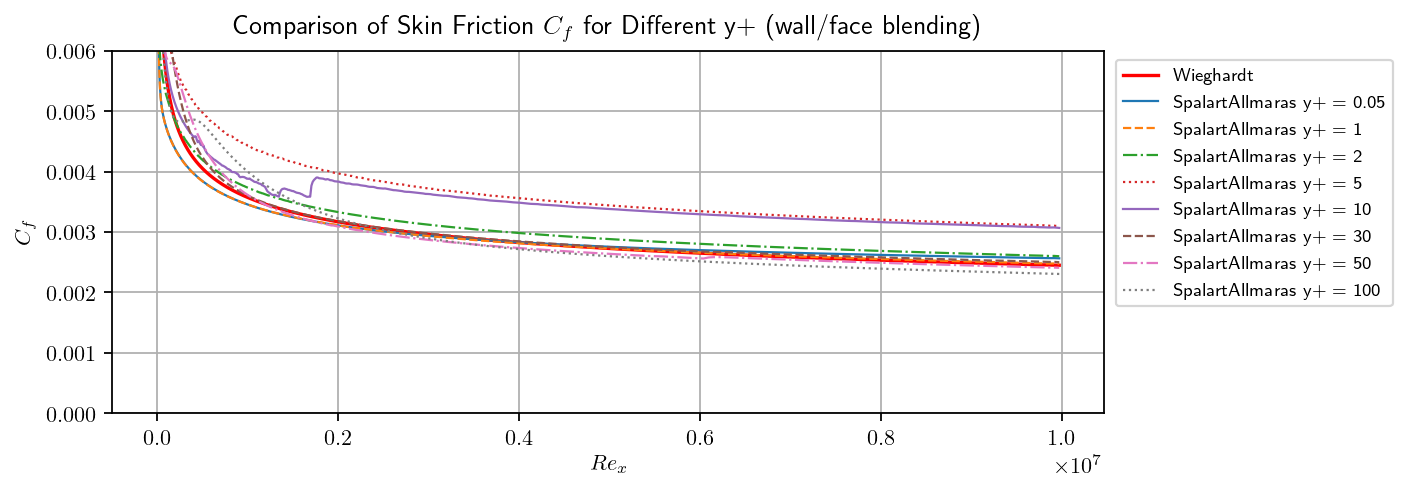

In [12]:
style3 = ["-", "--", "-.", ":"]
lw3 = 1.0
stylecycler2 = cycle(style3)

fig3, ax3 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
ax3.set_xlabel(r"$Re_x$")
ax3.set_ylabel(r"$C_f$")
plt.title(r"Comparison of Skin Friction $C_f$ for Different y+ (wall/face blending)")
ax3.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax3.plot(Rex, Cf_wmSFface[i + len(res_list)*j], label = "{} y+ = {}".format(model_sa, yp[j]), ls = next(stylecycler2), c = "C{:d}".format(j), lw = lw3)
        ax3.legend(fontsize = 8, bbox_to_anchor=(1.3, 1))        

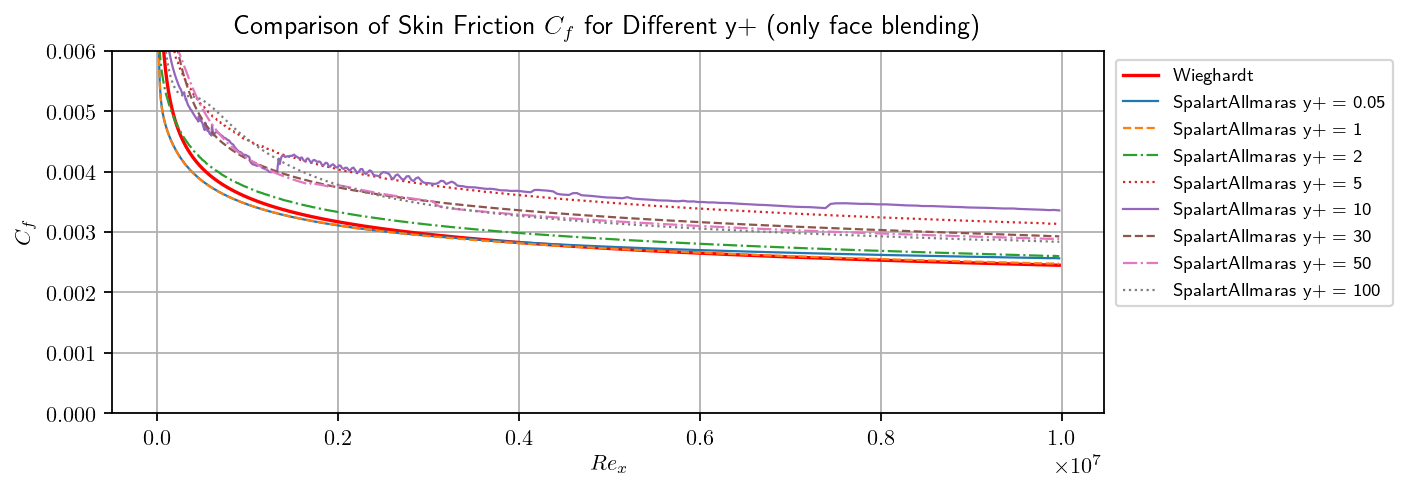

In [13]:
style4 = ["-", "--", "-.", ":"]
lw4 = 1.0
stylecycler3 = cycle(style4)

fig4, ax4 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
ax4.set_xlabel(r"$Re_x$")
ax4.set_ylabel(r"$C_f$")
plt.title(r"Comparison of Skin Friction $C_f$ for Different y+ (only face blending)")
ax4.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax4.plot(Rex, Cf_wmSFface2[i + len(res_list)*j], label = "{} y+ = {}".format(model_sa, yp[j]), ls = next(stylecycler3), c = "C{:d}".format(j), lw = lw4)
        ax4.legend(fontsize = 8, bbox_to_anchor=(1.3, 1))        